# Introduction

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
from scipy import stats

from yf_helpers import get_dow_jones_indeces, yf_downloader, yf_reader

## Single Time Series Data

In [2]:
start = "-10y"
end = "2024-11-06"
ticker = "TSLA"
tsla_file = yf_downloader(ticker, start, end)

Data already exists


In [3]:
start_date = "2022-01-01"
end_date = "2024-11-01"
tsla = yf_reader(tsla_file, start_date, end_date).set_index("date")
tsla.tail()

,symbol,adjusted,close,high,low,open,volume
date,,,,,,,
2024-10-28,TSLA,262.510010,262.510010,273.540009,262.239990,270.000000,107653600.0
2024-10-29,TSLA,259.519989,259.519989,264.980011,255.509995,264.510010,80521800.0
2024-10-30,TSLA,257.549988,257.549988,263.350006,255.820007,258.040009,53993600.0
2024-10-31,TSLA,249.850006,249.850006,259.750000,249.250000,257.989990,66575300.0
2024-11-01,TSLA,248.979996,248.979996,254.000000,246.630005,252.039993,57544800.0


### Price-Volume Chart

In [13]:
fig = go.Figure(
    go.Ohlc(
        x=tsla.index,
        open=tsla["open"],
        high=tsla["high"],
        low=tsla["low"],
        close=tsla["close"],
    )
)
fig.update_layout(template="ggplot2", height=400)

### Candlestick Chart

In [5]:
tsla_2024 = yf_reader(tsla_file, "2024-07-01", end).set_index("date")
tsla_2024.tail()

,symbol,adjusted,close,high,low,open,volume
date,,,,,,,
2024-10-30,TSLA,257.549988,257.549988,263.350006,255.820007,258.040009,53993600.0
2024-10-31,TSLA,249.850006,249.850006,259.750000,249.250000,257.989990,66575300.0
2024-11-01,TSLA,248.979996,248.979996,254.000000,246.630005,252.039993,57544800.0
2024-11-04,TSLA,242.839996,242.839996,248.899994,238.880005,244.559998,68802400.0
2024-11-05,TSLA,251.440002,251.440002,255.279907,246.210098,247.399994,65759459.0


In [12]:
fig = go.Figure(
    go.Candlestick(
        x=tsla_2024.index,
        open=tsla_2024["open"],
        high=tsla_2024["high"],
        low=tsla_2024["low"],
        close=tsla_2024["close"],
    )
)
fig.update_layout(template="ggplot2", xaxis_rangeslider_visible=False, height=400)

### Plotting Returns

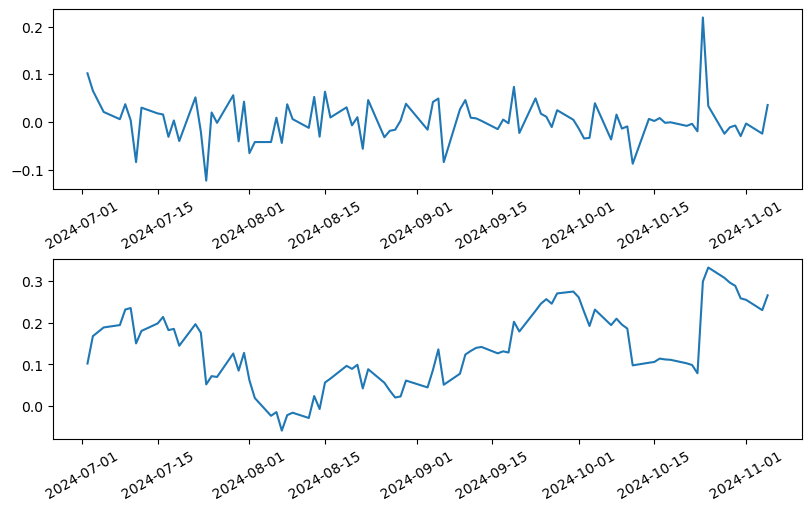

In [7]:
daily_changes = tsla_2024.close.pct_change(periods=1)
_, axes = plt.subplots(2, 1, figsize=(8, 5), constrained_layout=True)
axes[0].plot(daily_changes)
axes[1].plot(daily_changes.cumsum())
for ax in axes:
    labels = ax.get_xticklabels()
    for label in labels:
        label.set_rotation(30)

### Plotting Histograms

<Axes: >

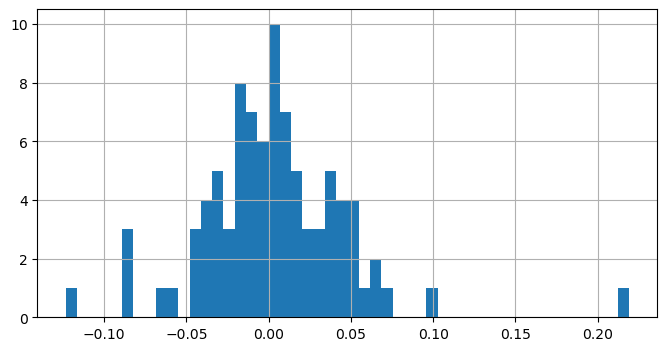

In [8]:
daily_changes.hist(bins=50, figsize=(8, 4))

### Plotting Volatility

<Axes: xlabel='date'>

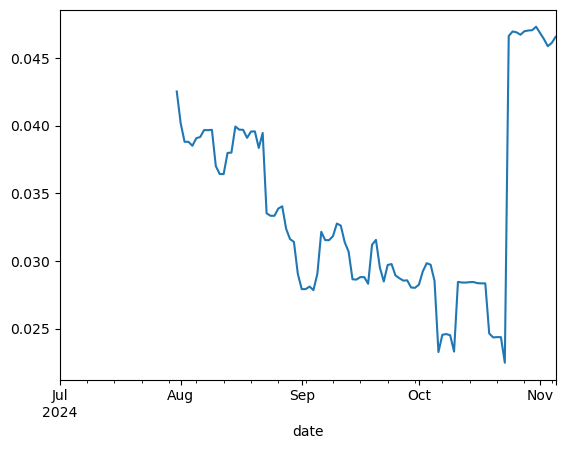

In [9]:
tsla_filled = tsla_2024.asfreq("D", method="ffill")
tsla_returns = tsla_filled.close.pct_change()
tsla_std = tsla_returns.rolling(window=30, min_periods=30).std()
tsla_std.plot()

### Q-Q Plot

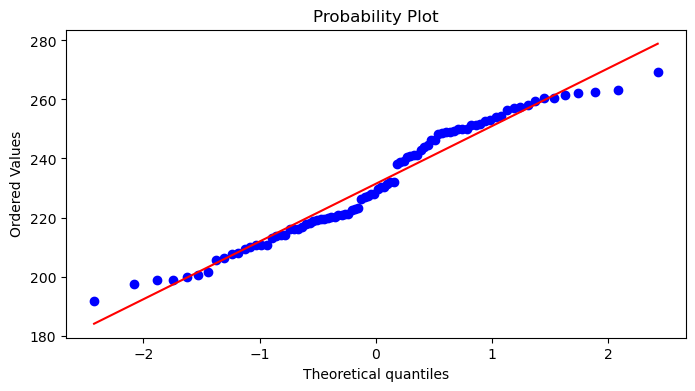

In [10]:
daily_changes = daily_changes.dropna()

_, ax = plt.subplots(figsize=(8, 4))
qq = stats.probplot(tsla_2024.close, dist="norm", plot=ax)

## Multiple Time Series Data

In [11]:
symbols = get_dow_jones_indeces()

TypeError: 'SSLContext' object is not callable

In [ ]:
symbols_file = yf_downloader(symbols, start="-10y", end=end)
symbols_df = yf_reader(symbols_file, start_date, end_date).set_index("date")
symbols_df.tail()

In [ ]:
_, ax = plt.subplots(figsize=(8, 4))
for symbol in symbols:
    symbols_df.query(f"symbol == '{symbol}'").close.plot(ax=ax)

### Displaying the Correlation Matrix

In [ ]:
corr_df = symbols_df.pivot_table(index="date", columns="symbol", values="close")
corr_df.head()

In [ ]:
corr_df.pct_change().corr().head()

### Plotting Correlations

In [ ]:
tesla_t = ["TSLA", "TM"]
start_date, end_date = "2021-01-01", "2024-11-06"
tt_file = yf_downloader(tesla_t, start="-5y", end=end)
tt_df = yf_reader(tt_file, start_date, end_date).set_index("date")
tt_df.tail()

In [ ]:
tt_df_filled = tt_df.pivot_table(index="date", columns="symbol", values="close").asfreq(
    "D", method="ffill"
)
tt_df_filled.head()

In [ ]:
daily_changes = tt_df_filled.pct_change()
tesla_returns = daily_changes["TSLA"]
li_returns = daily_changes["TM"]
window = int(len(tt_df_filled.index) / 2)
df_corrs = (
    tesla_returns.rolling(window=window, min_periods=window)
    .corr(other=li_returns)
    .dropna()
)
df_corrs.plot(figsize=(8, 4))

### Simple Moving Averages

In [ ]:
tsla_filled = tsla.asfreq("D", method="ffill")
tsla_last = tsla.close

series_short = tsla_last.rolling(window=5, min_periods=5).mean()
series_long = tsla_last.rolling(window=30, min_periods=30).mean()

tsla_sma = pd.DataFrame(columns=["short", "long"])
tsla_sma["short"] = series_short
tsla_sma["long"] = series_long
tsla_sma.plot(figsize=(8, 4))

### Exponential Moving Average

In [ ]:
series_short = tsla_last.ewm(span=5).mean()
series_long = tsla_last.ewm(span=30).mean()

tsla_ema = pd.DataFrame(columns=["short", "long"])
tsla_ema["short"] = series_short
tsla_ema["long"] = series_long
tsla_ema.plot(figsize=(8, 4))